In [1]:
import rbo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data=pd.read_csv("RBO-Role-Repayment.csv")

In [3]:
ar_rank=data[data['ROLES']=='ARCHITECT']
te_rank=data[data['ROLES']=='ENGINEER']
ma_rank=data[data['ROLES']=='MANAGEMENT']

In [4]:
roles=['ARCHITECT','ENGINEER','MANAGEMENT']
p_values=np.arange(0.5, 0.98, 0.01)

In [5]:
rboDF=pd.DataFrame(columns = ['roles' , 'p', 'RBO'])
for i in range(len(roles)):
    for j in range(len(roles)):
        if i>j:
            for p_val in p_values:
                #print(countries[i]+"-"+countries[j]+","+str(p))
                rbo_ext=rbo.rbo(data[data['ROLES']==roles[i]]['PAYMENT'], data[data['ROLES']==roles[j]]['PAYMENT'], p=p_val)
                #rboDF=rboDF.append({'Countries':'CO-CHI','p':0.5,'RBO':99},ignore_index=True)
                rboDF=rboDF.append({'roles':roles[i]+"-"+roles[j],'p':p_val,'RBO':rbo_ext['ext']},ignore_index=True)
            
        

In [6]:
rbo_ext=rbo.rbo(data[data['ROLES']==roles[0]]['PAYMENT'], data[data['ROLES']==roles[1]]['PAYMENT'], p=0.95)
rbo_ext

{'min': 0.4483574118737742,
 'res': 0.22698281902170264,
 'ext': 0.5803866494370562}

In [7]:
rboDF.sample(5)

,roles,p,RBO
112,MANAGEMENT-ENGINEER,0.66,0.659666
143,MANAGEMENT-ENGINEER,0.97,0.650528
96,MANAGEMENT-ENGINEER,0.50,0.724447
120,MANAGEMENT-ENGINEER,0.74,0.644961
10,ENGINEER-ARCHITECT,0.60,0.660394


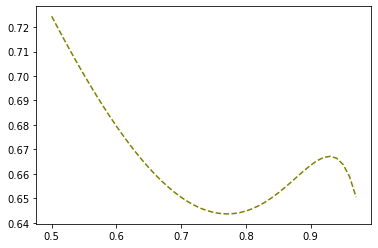

In [8]:
plt.plot( 'p', 'RBO', data=rboDF[rboDF['roles']=='MANAGEMENT-ENGINEER'], color='olive', linestyle='dashed', label=roles[i]+"-"+roles[j])

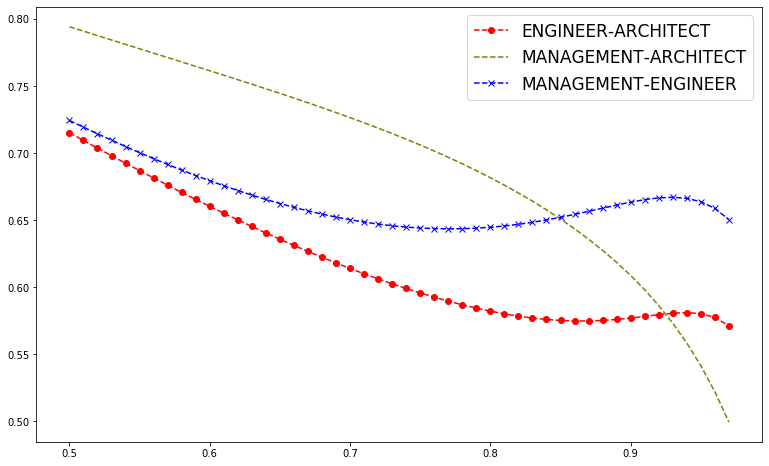

In [9]:
colors=['red','olive','blue','black','green','orange']
markers=['o','','x','o','','x']
plt.figure(figsize=(13,8))
count=0
for i in range(len(roles)):
    for j in range(len(roles)):
        if i>j:
            
            pair=roles[i]+"-"+roles[j]
            plt.plot( 'p', 'RBO', data=rboDF[rboDF['roles']==pair], marker=markers[count], color=colors[count]
                     , linestyle='dashed', label=pair)
            count=count+1
plt.legend(prop={'size': 17})


In [10]:
rbo.rbo(ma_rank['PAYMENT'], ar_rank['PAYMENT'], p=.5)

{'min': 0.7944235118121314,
 'res': 1.623101371724091e-06,
 'ext': 0.7944254452983356}

In [11]:
rbo.rbo(ma_rank['PAYMENT'], ar_rank['PAYMENT'], p=.97)

{'min': 0.35145856593008434,
 'res': 0.41389461251291576,
 'ext': 0.4995225302071171}

In [12]:
rbo.rbo(te_rank['PAYMENT'], ar_rank['PAYMENT'], p=.5)

{'min': 0.7153123705025957,
 'res': 1.6220833121651017e-06,
 'ext': 0.7153138123878064}

In [13]:
rbo.rbo(te_rank['PAYMENT'], ar_rank['PAYMENT'], p=.5)

{'min': 0.7153123705025957,
 'res': 1.6220833121651017e-06,
 'ext': 0.7153138123878064}

In [14]:
rbo.rbo(te_rank['PAYMENT'], ar_rank['PAYMENT'], p=.97)

{'min': 0.37033271320033756,
 'res': 0.38865725088111513,
 'ext': 0.5712586969394341}

In [15]:
rbo.rbo(te_rank['REPAYMENT'], ma_rank['REPAYMENT'], p=.5)

KeyError: 'REPAYMENT'

In [ ]:
rbo.rbo(te_rank['PAYMENT'], ma_rank['PAYMENT'], p=.97)